In [5]:
import matplotlib.pyplot as plt
from hhdata.AnalysesDatabase import selectAnalyses
from hhdata.AnalysesDatabase import *
from collections import OrderedDict as odict
import numpy as np

In [102]:
def _plot(ana_odict,
          func_x, 
          func_y,
          func_xerr=None,
          func_yerr=None,
          xlabel=None,
          ylabel=None,
          func_label=lambda a: a.name,
          leg_loc='best',
          leg_labels=None,
          logx=False,
          logy=False,
          func_text=None,
          colors=None,
          xlim=None,
          ylim=None,
          deltax_text=4.0,
          deltay_text=0.,
         ):
    fig = plt.figure()

    for i, (ananame, analyses) in enumerate(ana_odict.items()):
        plt.errorbar([func_x(a) for a in analyses],
                     [func_y(a) for a in analyses],
                     xerr=[func_xerr(a) for a in analyses] if func_xerr is not None else None,
                     yerr=[
                        [func_yerr(a)[0] for a in analyses] if func_yerr is not None else None,
                        [func_yerr(a)[1] for a in analyses] if func_yerr is not None else None
                     ],
                     label=f'{func_label(analyses[0]) if leg_labels is None else leg_labels[i]}',
                     fmt='o',
                     color=colors[i] if colors is not None else None
                     )
        if func_text is not None:
            for a in analyses:
                plt.text(func_x(a)+deltax_text, func_y(a) + deltay_text, func_text(a),
                         color=colors[i] if colors is not None else None,
                        #  backgroundcolor='white',
                         alpha=0.7,
                         )
                # plt.annotate(func_text(a), (func_x(a), func_y(a)))

    if xlabel is not None: plt.xlabel(xlabel)
    if ylabel is not None: plt.ylabel(ylabel)
    if leg_loc is not None:
        plt.legend(loc=leg_loc, frameon=False)
    if logx: plt.semilogx()
    if logy: plt.semilogy()
    if ylim is not None: plt.ylim(ylim)
    if xlim is not None: plt.xlim(xlim)

def _plot_fit(xs,ys,leg_labels=None,colors=None):
    for i, (x, y) in enumerate(zip(xs,ys)):
        color = colors[i] if colors is not None else None
        label=None
        if leg_labels is not None:
            if len(leg_labels) > i:
                label = leg_labels[i]
                if isinstance(label,dict):
                    color = label['color']
                    label = label['label']
            else: label=None
        plt.plot(x,y,
                 '--',
                 color=color,
                 label=label,
                )

def _fit(analyses,i_to_fit=1):
    ana=analyses[i_to_fit]
    lumi = ana.lumi
    mu95_exp = ana.mu95_exp

    lumis = [a.lumi for a in analyses]

    N = 100
    x = np.linspace(min(lumis), max(lumis),100)
    y = mu95_exp * (x/lumi)**(-0.5)
    return (x,y)


def plotExpectedMu95VsLumi(ana_odict, labels=None, fit_indices=None, colors=[f'C{i}' for i in range(len(ana_odict))],outfig=None,**kwargs):
    _plot(ana_odict,
          lambda a: a.lumi,
          lambda a: a.mu95_exp,
          func_yerr=lambda a: [abs(x - a.mu95_exp) for x in a.mu95_exp_err] if a.mu95_exp_err is not None else [0,0],
          xlabel='Luminosity $\mathcal{L} (fb^{-1}$)',
          ylabel='Expected 95% CL upper limit on $HH$ signal strength $\mu_{HH}$',
          leg_labels=labels,
          colors=colors,
        **kwargs
          )

    # xmin, xmax, ymin, ymax = plt.axis()
    # plt.text(
    #     xmin+0.02*abs(xmax-xmin),
    #     ymin+0.02*abs(ymax-ymin),
    #     '\xa9 M. Valente (2022)',
    #     color='grey'
    # )
    
    if fit_indices is not None:
        ana_names = list(ana_odict.keys())
        xs, ys = [],[]
        for i,aname in enumerate(ana_names):
            if i not in fit_indices: continue
            x, y = _fit(ana_odict[aname])
            xs+=[x]
            ys+=[y]
        _plot_fit(xs,ys,colors=colors,leg_labels=labels[len(ana_odict):])
    plt.legend(loc='best', frameon=False)
    if outfig is not None:
        if '/' in outfig:
            from os import mkdir
            try:
                mkdir(os.path.dirname(outfig))
            except FileExistsError:
                pass
            plt.savefig(outfig)


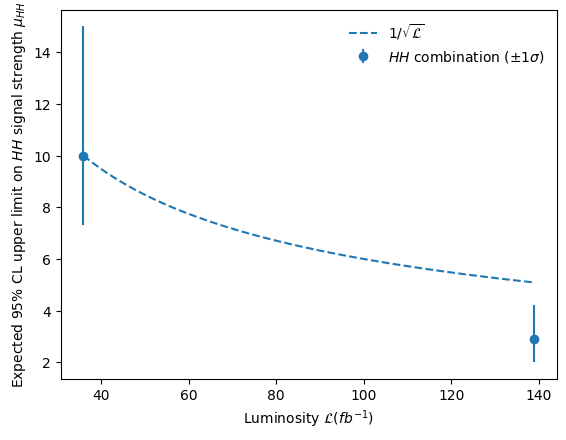

In [103]:
ana_odict = odict()
ana_odict['Comb'] = selectAnalyses(lambda ana: sel_comb(ana) * sel_Run2(ana))

labels = [
          '$HH$ combination ($\pm 1\sigma$)',
          '$1/\sqrt{\mathcal{L}}$'
         ]

plotExpectedMu95VsLumi(ana_odict,labels=labels,fit_indices=[0],outfig='../figures/combination.pdf')

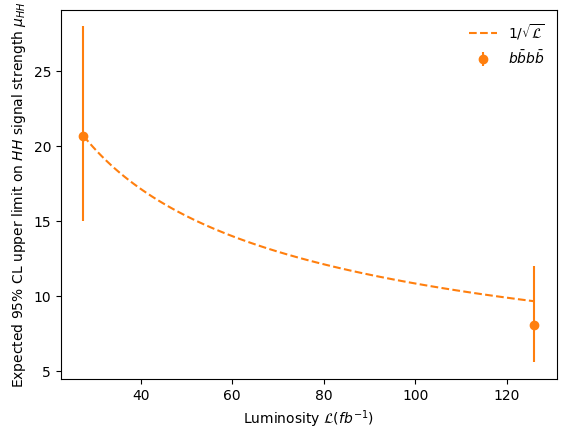

In [104]:
ana_odict = odict()
ana_odict['bbbb'] = selectAnalyses(lambda ana: sel_bbbb(ana) * sel_Run2(ana))

labels = [
          '$b\\bar{b}b\\bar{b}$', \
          '$1/\sqrt{\mathcal{L}}$'
         ]

plotExpectedMu95VsLumi(ana_odict,labels=labels,fit_indices=[0],colors=['C1'],outfig='../figures/bbbb.pdf')

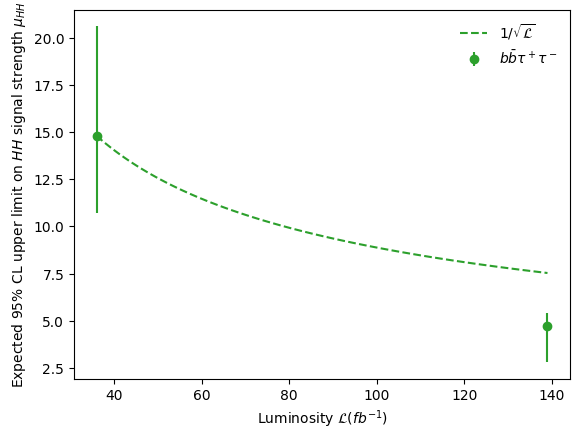

In [105]:
ana_odict = odict()
ana_odict['bbtt'] = selectAnalyses(lambda ana: sel_bbtt(ana) * sel_Run2(ana))

labels = [
          '$b\\bar{b}\\tau^+\\tau^-$',
          '$1/\sqrt{\mathcal{L}}$'
         ]

plotExpectedMu95VsLumi(ana_odict,labels=labels,fit_indices=[0],colors=['C2'],outfig='../figures/bbtt.pdf')

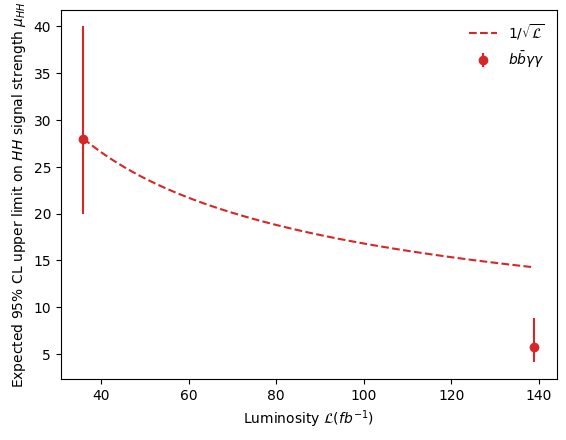

In [106]:
ana_odict = odict()
ana_odict['bbyy'] = selectAnalyses(lambda ana: sel_bbyy(ana) * sel_Run2(ana))

labels = [
          '$b\\bar{b}\gamma\gamma$',
          '$1/\sqrt{\mathcal{L}}$'
         ]

plotExpectedMu95VsLumi(ana_odict,labels=labels,fit_indices=[0],colors=['C3'],outfig='../figures/bbyy.pdf')

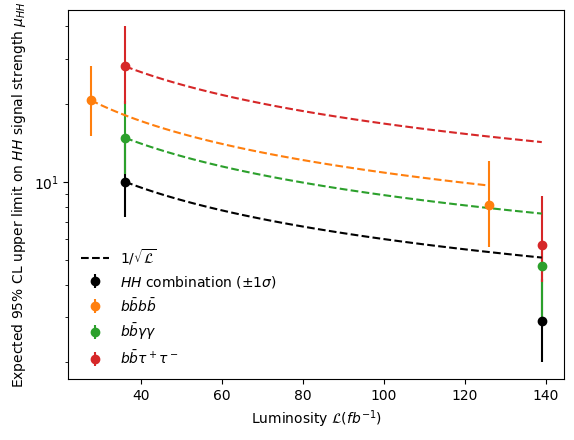

In [108]:
ana_odict = odict()

ana_odict['Comb'] = selectAnalyses(lambda ana: sel_comb(ana) * sel_Run2(ana))
ana_odict['bbbb'] = selectAnalyses(lambda ana: sel_bbbb(ana) * sel_Run2(ana))
ana_odict['bbtt'] = selectAnalyses(lambda ana: sel_bbtt(ana) * sel_Run2(ana))
ana_odict['bbyy'] = selectAnalyses(lambda ana: sel_bbyy(ana) * sel_Run2(ana))

labels = [
          '$HH$ combination ($\pm 1\sigma$)',
          '$b\\bar{b}$$b\\bar{b}$',
          '$b\\bar{b}\gamma\gamma$',
          '$b\\bar{b}\\tau^+\\tau^-$',
          '$1/\sqrt{\mathcal{L}}$',
        #   '$1/\sqrt{\mathcal{L}}$',
        #   '$1/\sqrt{\mathcal{L}}$',
        #   '$1/\sqrt{\mathcal{L}}$',
         ]

plotExpectedMu95VsLumi(ana_odict,
  labels=labels,
  fit_indices=[0,1,2,3],
  colors=['black','C1','C2','C3'],
  outfig='../figures/comb_bbbb_bbtt_bbyy.pdf',
  logy=True,
  # func_text=lambda a: a.ref,
  # xlim=(20,260)
  )